In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_47.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_45.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_50.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_48.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_42.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_43.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_49.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_46.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_41.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Low Light/Two_44.jpg
/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet/Two/Coin 2/Artificia

In [49]:
import numpy as np 
import tensorflow as tf 
import tensorflow.keras as keras 
import matplotlib.pyplot as plt 
import cv2 
import os 
import glob
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import shutil

In [50]:


# shutil.rmtree("/kaggle/working/Merged_DataSet", ignore_errors=True)

In [51]:
# def merge_images(original_root, new_root):
#     os.makedirs(new_root, exist_ok=True)  # Create new dataset directory

#     for denomination in os.listdir(original_root):
#         denom_path = os.path.join(original_root, denomination)
#         new_denom_path = os.path.join(new_root, denomination)

#         if os.path.isdir(denom_path):
#             os.makedirs(new_denom_path, exist_ok=True)  # Create denomination folder in new directory

#             for coin in os.listdir(denom_path):
#                 coin_path = os.path.join(denom_path, coin)
#                 if os.path.isdir(coin_path):
#                     for subfolder in os.listdir(coin_path):
#                         subfolder_path = os.path.join(coin_path, subfolder)
#                         if os.path.isdir(subfolder_path):
#                             for img in os.listdir(subfolder_path):
#                                 img_path = os.path.join(subfolder_path, img)
#                                 shutil.copy(img_path, os.path.join(new_denom_path, img))  # Copy all images to denomination folder

# # Paths
# original_dataset_path = "/kaggle/input/indian-coin-denomination-dataset-icdd/DataSet"
# new_dataset_path = "/kaggle/working/Merged_DataSet"  # New directory for merged folders

# merge_images(original_dataset_path, new_dataset_path)

In [52]:
one, two, five, ten,twenty = [], [], [], [],[]

# Load rupee 1 coin images
for x in glob.iglob('/kaggle/working/Merged_DataSet/One/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    one.append(img)

print(f"Number of rupee 1 images loaded: {len(one)}")


Number of rupee 1 images loaded: 210


In [53]:
for x in glob.iglob('/kaggle/working/Merged_DataSet/Ten/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    ten.append(img)

print(f"Number of rupee 10 images loaded: {len(ten)}")

Number of rupee 10 images loaded: 180


In [54]:
for x in glob.iglob('/kaggle/working/Merged_DataSet/Two/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    two.append(img)

print(f"Number of rupee 2 images loaded: {len(two)}")

Number of rupee 2 images loaded: 120


In [55]:
for x in glob.iglob('/kaggle/working/Merged_DataSet/Five/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    five.append(img)

print(f"Number of rupee 5 images loaded: {len(five)}")

Number of rupee 5 images loaded: 270


In [56]:
for x in glob.iglob('/kaggle/working/Merged_DataSet/Twenty/*.[jJ][pP][gG]'):  # Case-insensitive
    img = cv2.imread(x)
    if img is None:  # Handle missing/corrupt images
        print(f"Failed to load image: {x}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (480,480))
    twenty.append(img)

print(f"Number of rupee 5 images loaded: {len(twenty)}")

Number of rupee 5 images loaded: 120


Text(0.5, 1.0, 'ten')

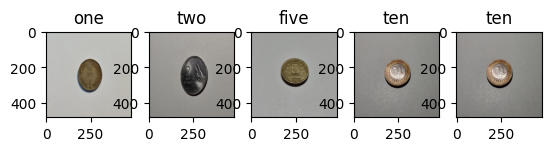

In [57]:
plt.subplot(151)
plt.imshow(one[54])
plt.title('one')
plt.subplot(152)
plt.imshow(two[54])
plt.title('two')
plt.subplot(153)
plt.imshow(five[54])
plt.title('five')
plt.subplot(154)
plt.imshow(ten[54])
plt.title('ten')
plt.subplot(155)
plt.imshow(ten[54])
plt.title('ten')

In [58]:

one=np.array(one)
two=np.array(two)
five=np.array(five)
ten=np.array(ten)
twenty=np.array(twenty)

Text(0.5, 1.0, 'ten')

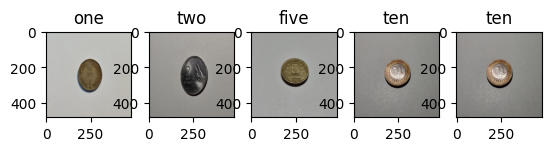

In [59]:
plt.subplot(151)
plt.imshow(one[54])
plt.title('one')
plt.subplot(152)
plt.imshow(two[54])
plt.title('two')
plt.subplot(153)
plt.imshow(five[54])
plt.title('five')
plt.subplot(154)
plt.imshow(ten[54])
plt.title('ten')
plt.subplot(155)
plt.imshow(ten[54])
plt.title('ten')

In [60]:
print(len(one))
print(len(two))
print(len(five))
print(len(ten))
print(len(twenty))

210
120
270
180
120


In [61]:

one_label = np.ones(len(one))


two_label = np.full(len(two), 2)

five_label = np.full(len(five), 5)


ten_label = np.full(len(ten), 10)
twenty_label = np.full(len(twenty), 20)
print(twenty_label[:6])


[20 20 20 20 20 20]


In [62]:
# Concatenating multiple arrays using a list
all_images = np.concatenate([one, two, five, ten,twenty], axis=0)
all_labels = np.concatenate([one_label, two_label, five_label, ten_label,twenty_label], axis=0)


In [63]:
print(len(one)+len(two)+len(five)+len(ten)+len(twenty))
print(all_images.shape)

900
(900, 480, 480, 3)


In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D


In [65]:
all_images, all_labels = shuffle(all_images, all_labels, random_state=42)

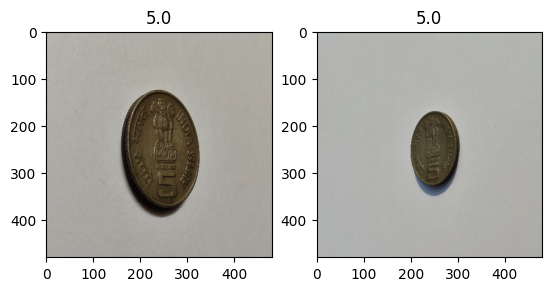

In [66]:
plt.subplot(121)
plt.imshow(all_images[50])
plt.title(all_labels[50])
plt.subplot(122)
plt.imshow(all_images[174])
plt.title(all_labels[174])
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

In [68]:
label_mapping = {1: 0, 2: 1, 5: 2, 10: 3,20:4}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])


In [69]:
y_train = to_categorical(y_train, num_classes=5)  # Convert to one-hot
y_test = to_categorical(y_test, num_classes=5)  # Convert to one-hot

In [70]:
base_model = keras.applications.EfficientNetV2L(
    include_top=False,  # Exclude the original classification layer
    weights="imagenet",  # Pre-trained weights from ImageNet
    input_shape=(480,480, 3),  
    classes=4
)

# Freeze the base model layers
base_model.trainable = False

# Create the custom model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),  # Add another dropout
    keras.layers.Dense(5, activation='softmax')
])

In [71]:



from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.3,  # Zoom
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest'  # Fill gaps with nearest pixels
)

# Fit the data generator to your training data
datagen.fit(X_train)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Use the generator to train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=20),
    epochs=30,  # Increase epochs for better results
    validation_data=(X_test, y_test)
)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.3723 - loss: 1.5496 - val_accuracy: 0.6278 - val_loss: 0.9945
Epoch 2/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.6097 - loss: 0.9804 - val_accuracy: 0.8222 - val_loss: 0.6762
Epoch 3/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7452 - loss: 0.6827 - val_accuracy: 0.8000 - val_loss: 0.5752
Epoch 4/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7389 - loss: 0.6636 - val_accuracy: 0.7722 - val_loss: 0.5778
Epoch 5/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7664 - loss: 0.6008 - val_accuracy: 0.8667 - val_loss: 0.4434
Epoch 6/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.7839 - loss: 0.5645 - val_accuracy: 0.9167 - val_loss: 0.3407
Epoch 7/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8085 - loss: 0.4737 - val_accuracy: 0.9167 - val_loss: 0.3021
Epoch 8/30
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.8499 - loss: 0.4071 - val_accuracy: 0.8167 - val_loss: 0.4255
Ep

In [72]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=32)

# Print the loss and accuracy
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1] * 100:.2f}%")


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9708 - loss: 0.0938
Test Loss: 0.10208901017904282
Test Accuracy: 96.67%


In [73]:
predicted=model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step


In [74]:
mse=mean_squared_error(y_test,predicted)
print('Mean Square Error ',mse)
print("Root Mean Square Error ",np.sqrt(mse))


Mean Square Error  0.010281154410601134
Root Mean Square Error  0.10139602758787512


In [80]:
shutil.rmtree("/kaggle/working/coin_detection_model.h5", ignore_errors=True)

In [81]:
# Save the model
model.save('coin_detection_new_model.h5')
